In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [141]:
# df = pd.read_csv("C:\\Users\\coolm\\Documents\\GSU\\Data Mining\\crimes-in-chicago\\Chicago_Crimes_2012_to_2017.csv")
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

In [142]:
df.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"


In [143]:
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

### Number of records = 1,456,714 => >5k
### 23 columns > 10 column requirement

In [145]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

## There is a significant amount of location data that is missing. 

### Imputation: Long Lat ### 
Calculate the mean long lat for each ward
Build lookup table
For each missing long lat, look up the ward and replace the missing value with the value in loop up table

In [146]:
features = ["Ward", "Longitude", "Latitude"]
temp = (df[features]).groupby("Ward").mean()
temp.head()

,Longitude,Latitude
Ward,,
1.0,-87.681166,41.910664
2.0,-87.653171,41.870792
3.0,-87.626850,41.814090
4.0,-87.603932,41.814684
5.0,-87.588531,41.765896


In [147]:
# mask = (temp['Ward'] == '1.0')
temp.columns

Index(['Longitude', 'Latitude'], dtype='object')

In [148]:
temp.loc[1]

Longitude   -87.681166
Latitude     41.910664
Name: 1.0, dtype: float64

In [149]:
df.loc[df['Longitude'].isnull(),'Longitude']  = df['Ward'].map(temp.Longitude)

In [150]:
df.loc[df['Latitude'].isnull(),'Latitude']  = df['Ward'].map(temp.Latitude)

In [151]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Location                37083
dtype: int64

### Imputation: Ward ###

Drop the missing values, since only 14 are missing and that is very few compared to the size of the dataset

In [152]:
df.dropna(subset=['Ward'],inplace=True)

### Imputation: Community Area ### 

In [153]:
features = ["Ward", "Community Area"]
temp = (df[features]).groupby(features).aggregate({"Community Area":['count']})
temp = temp.reset_index()
temp.columns = ['Ward', 'Community', 'count']

df_agg = temp.groupby(['Ward','Community']).agg({'count':sum})
g = df_agg['count'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(1))

res = res.reset_index()
df.loc[df["Community Area"].isnull(),"Community Area"]  = df['Ward'].map(res.Community)

In [154]:
# features = ["Ward", "Community Area"]
# temp = (df[features]).groupby("Ward").mean()
# df.loc[df["Community Area"].isnull(),"Community Area"]  = df["Ward"].map(temp['Community Area'])

### Imputation: District ###

In [155]:
# features = ["Ward", "District"]
# temp = (df[features]).groupby("Ward").mean()
# df.loc[df["District"].isnull(),"Community Area"]  = df["Ward"].map(temp['District'])

features = ["Ward", "District"]
temp = (df[features]).groupby(features).aggregate({"District":['count']})
temp = temp.reset_index()
temp.columns = ['Ward', 'District', 'count']

df_agg = temp.groupby(['Ward','District']).agg({'count':sum})
g = df_agg['count'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(1))

res = res.reset_index()
df.loc[df["District"].isnull(),"District"]  = df['Ward'].map(res.District)

In [156]:
# df["Community Area"].map()
df.loc[df["Community Area"].isnull(),"Community Area"]

Series([], Name: Community Area, dtype: float64)

### Imputation: Location Description ###

In [157]:
features = ["Ward", "Location Description"]
temp = (df[features]).groupby(["Ward", "Location Description"]).aggregate({"Location Description":['count']})

In [158]:
type(temp)

pandas.core.frame.DataFrame

In [159]:
temp

Location Description
                                                  count
Ward Location Description                              
1.0  ABANDONED BUILDING                              17
     AIRPORT VENDING ESTABLISHMENT                    1
     ALLEY                                          489
     ANIMAL HOSPITAL                                  4
     APARTMENT                                     2438
...                                                 ...
50.0 VEHICLE - DELIVERY TRUCK                         1
     VEHICLE - OTHER RIDE SERVICE                     2
     VEHICLE NON-COMMERCIAL                         190
     VEHICLE-COMMERCIAL                               8
     WAREHOUSE                                        4

[4159 rows x 1 columns]

In [160]:
temp = temp.reset_index()

In [161]:
temp[('Location Description','count')]

0         17
1          1
2        489
3          4
4       2438
        ... 
4154       1
4155       2
4156     190
4157       8
4158       4
Name: (Location Description, count), Length: 4159, dtype: int64

In [162]:
temp.columns
# features = ["Ward", "Location Description", "count"]
# (temp[features]).groupby("Ward").max()

MultiIndex([(                'Ward',      ''),
            ('Location Description',      ''),
            ('Location Description', 'count')],
           )

In [163]:
temp.columns = ['Ward', 'Location', 'count']

In [164]:
temp['count']

0         17
1          1
2        489
3          4
4       2438
        ... 
4154       1
4155       2
4156     190
4157       8
4158       4
Name: count, Length: 4159, dtype: int64

In [165]:
df_agg = temp.groupby(['Ward','Location']).agg({'count':sum})
g = df_agg['count'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(1))

res.reset_index()

,Ward,Location,count
0,1.0,STREET,7503
1,2.0,STREET,10952
2,3.0,STREET,8825
3,4.0,STREET,5945
4,5.0,APARTMENT,9082
5,6.0,STREET,11562
6,7.0,APARTMENT,8834
7,8.0,STREET,8866
8,9.0,RESIDENCE,9902
9,10.0,STREET,5876


Make diagram for crimes in each ward

In [166]:
res.head()

Ward  Location 
1.0   STREET        7503
2.0   STREET       10952
3.0   STREET        8825
4.0   STREET        5945
5.0   APARTMENT     9082
Name: count, dtype: int64

In [167]:
res = res.reset_index()

In [168]:
df.loc[df["Location Description"].isnull(),"Location Description"]  = df['Ward'].map(res.Location)

In [169]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description       18
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Location                37083
dtype: int64

In [170]:
(df["Ward"].unique())

array([24., 20., 37., 28.,  8.,  3., 40., 17.,  7., 42.,  2.,  4.,  1.,
       18., 34.,  5., 32., 41., 21., 11., 14., 29., 44., 48.,  9., 33.,
       16., 23., 30., 43., 26., 27., 12., 45.,  6., 25., 47., 38., 50.,
       22., 19., 13., 36., 35., 15., 46., 10., 49., 39., 31.])

# EDA # 

#### There are 24 unique districts ####

check distribution of long lat in each district

In [171]:
df2 = df[df['Ward'].isnull()]

features = ["Ward", "Longitude", "Latitude"]
df2[features]

,Ward,Longitude,Latitude


In [172]:
features = ["Ward", "Longitude", "Latitude"]
df[features].sort_values(by='Ward')


,Ward,Longitude,Latitude
261588,1.0,-87.679551,41.932269
1303199,1.0,-87.679482,41.932269
162406,1.0,-87.688426,41.909347
717827,1.0,-87.686410,41.910335
717896,1.0,-87.674927,41.908752
...,...,...,...
686683,50.0,-87.686166,41.996266
1413347,50.0,-87.695121,42.000485
1072986,50.0,-87.698650,42.009387
738242,50.0,-87.715494,41.995376


1) Analyze only crime without reference to location

In [173]:
df2 = df.copy()

In [174]:
df2.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], 
         inplace=True, axis=1)


In [175]:
df2.head(2)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1154907.0,1893681.0,41.864073,-87.706819
1,10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,1183066.0,1864330.0,41.782922,-87.604363


In [176]:
# convert dates to pandas datetime format
df2.Date = pd.to_datetime(df2.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
df2.index = pd.DatetimeIndex(df2.Date)

In [177]:
df2.shape

(1456700, 13)

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456700 entries, 2016-05-03 23:40:00 to 2016-05-03 23:38:00
Data columns (total 13 columns):
ID                      1456700 non-null int64
Date                    1456700 non-null datetime64[ns]
Block                   1456700 non-null object
Primary Type            1456700 non-null object
Description             1456700 non-null object
Location Description    1456682 non-null object
Arrest                  1456700 non-null bool
Domestic                1456700 non-null bool
District                1456700 non-null float64
X Coordinate            1419617 non-null float64
Y Coordinate            1419617 non-null float64
Latitude                1456700 non-null float64
Longitude               1456700 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 136.1+ MB


As 'Location Description', 'Description' and 'Primary Type' columns are actually categorical columns (or factors in R), we will only keep the most frequent categories and then cast them to a categorical type.

In [179]:
loc_to_change  = list(df2['Location Description'].value_counts()[20:].index)
desc_to_change = list(df2['Description'].value_counts()[20:].index)

df2.loc[df2['Location Description'].isin(loc_to_change) , df2.columns=='Location Description'] = 'OTHER'
df2.loc[df2['Description'].isin(desc_to_change) , df2.columns=='Description'] = 'OTHER'

In [180]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
df2['Primary Type']         = pd.Categorical(df2['Primary Type'])
df2['Location Description'] = pd.Categorical(df2['Location Description'])
df2['Description']          = pd.Categorical(df2['Description'])

In [181]:
df2['Date'].min()

Timestamp('2012-01-01 00:00:00')

In [182]:
df2['Date'].max()

Timestamp('2017-01-18 23:49:00')

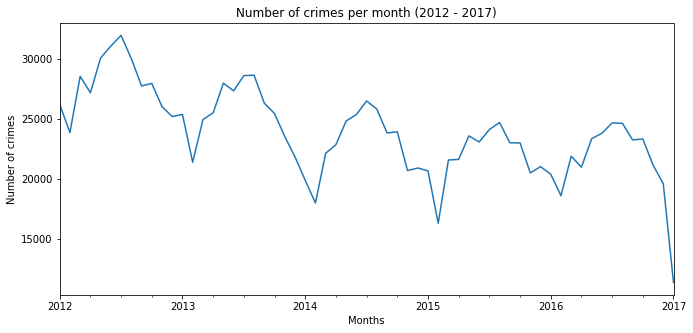

In [183]:
plt.figure(figsize=(11,5))
df2.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

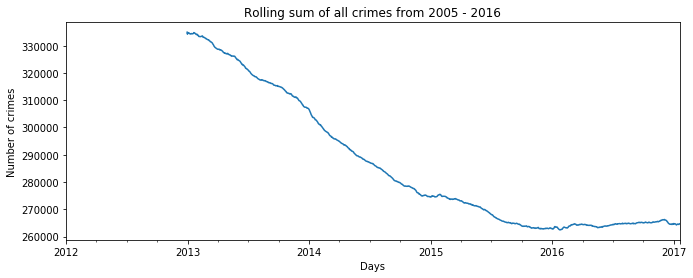

In [184]:
plt.figure(figsize=(11,4))
df2.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

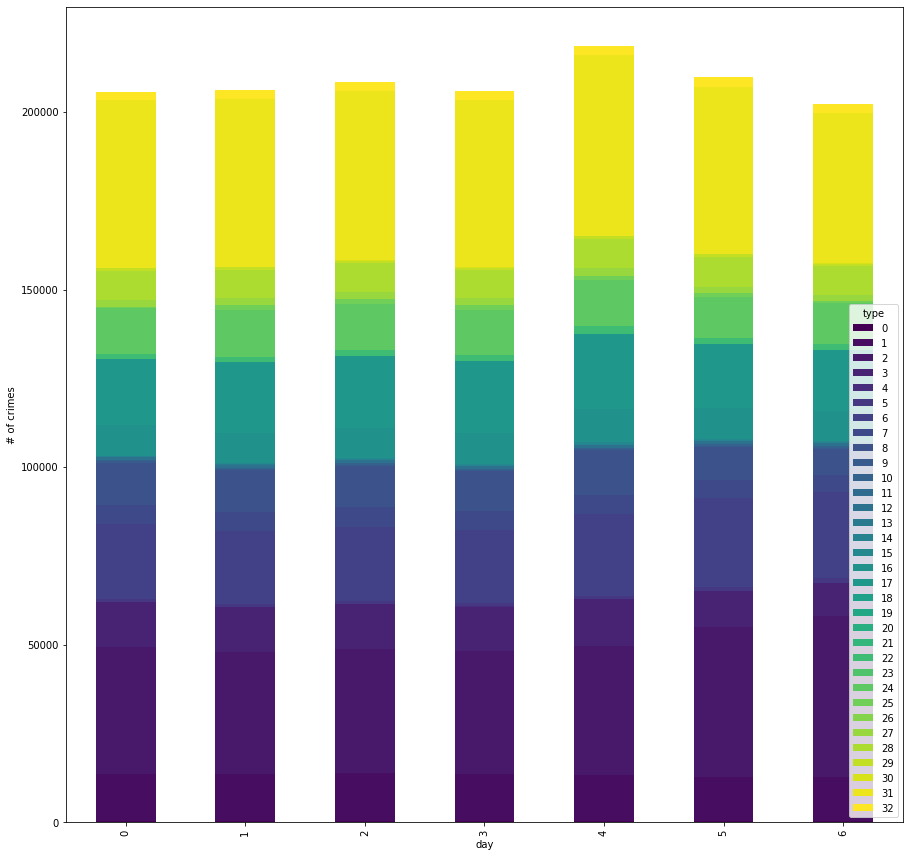

In [187]:
from sklearn import preprocessing
viridis = cm.get_cmap('viridis')

le = preprocessing.LabelEncoder()

test  = pd.DataFrame()
test['day'] = df2.index.dayofweek
test['type'] = df2['Primary Type'].values

le.fit(test['type'])
test['type'] = le.transform(test['type'])

features = ['day','type']
temp = (test).groupby(features).aggregate({"type":['count']})
temp = temp.reset_index()


temp.columns = ['day', 'type','count']

ax = pd.pivot_table(temp, index = 'day', columns = 'type', values = 'count') \
.plot(kind = 'bar',stacked = True, figsize = (15,15), cmap = viridis)
ax.set_ylabel("# of crimes")
ax.figure.savefig('CrimesPerDay.png')

In [188]:
test  = pd.DataFrame()
test['day'] = df2.index.dayofweek
test['type'] = df2['Primary Type'].values

features = ['day','type']
temp = (test).groupby(features).aggregate({"type":['count']})
temp

type
                                       count
day type                                    
0   ARSON                                324
    ASSAULT                            13184
    BATTERY                            35765
    BURGLARY                           12733
    CONCEALED CARRY LICENSE VIOLATION     20
...                                      ...
6   ROBBERY                             8054
    SEX OFFENSE                          678
    STALKING                             101
    THEFT                              42409
    WEAPONS VIOLATION                   2383

[227 rows x 1 columns]

In [189]:
df2['Primary Type'].values

[BATTERY, BATTERY, PUBLIC PEACE VIOLATION, BATTERY, THEFT, ..., BATTERY, CRIMINAL DAMAGE, BATTERY, BATTERY, OTHER OFFENSE]
Length: 1456700
Categories (33, object): [ARSON, ASSAULT, BATTERY, BURGLARY, ..., SEX OFFENSE, STALKING, THEFT, WEAPONS VIOLATION]

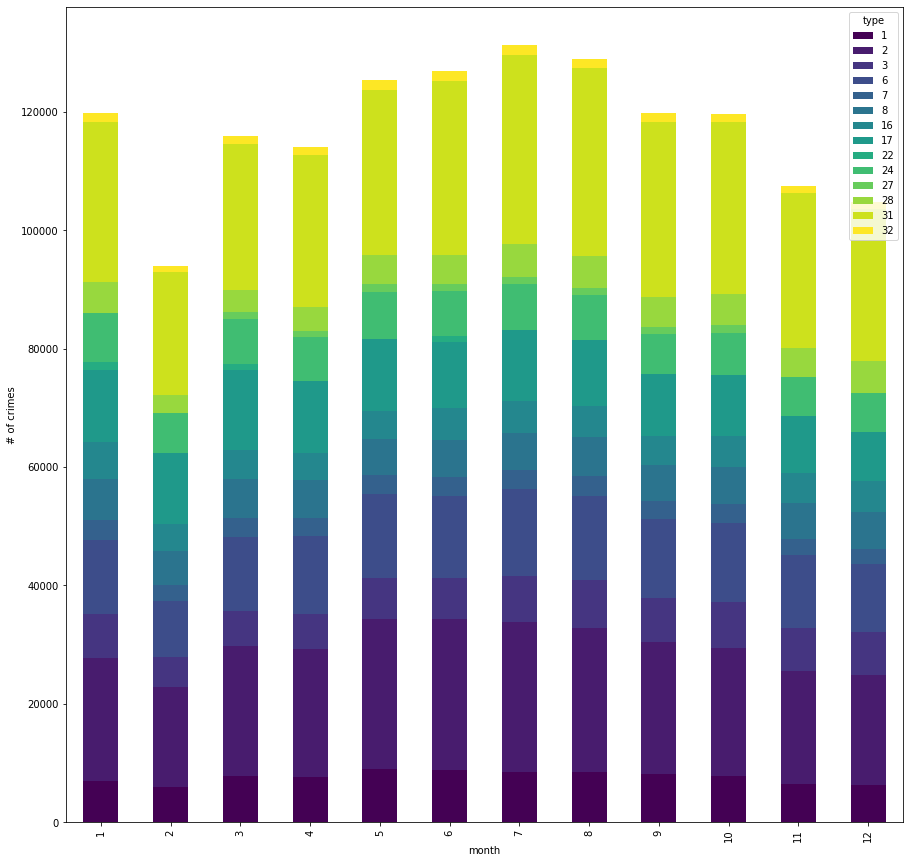

In [191]:
test  = pd.DataFrame()
test['month'] = df2.index.month
test['type'] = df2['Primary Type'].values

le.fit(test['type'])
test['type'] = le.transform(test['type'])

features = ['month','type']
temp = (test).groupby(features).aggregate({"type":['count']})
temp = temp.reset_index()


temp.columns = ['month', 'type','count']

temp = temp[temp['count'] > 1000]

ax = pd.pivot_table(temp, index = 'month', columns = 'type', values = 'count') \
.plot(kind = 'bar',stacked = True, figsize = (15,15), cmap = viridis)
ax.set_ylabel("# of crimes")
ax.figure.savefig('CrimesPerMonth.png')

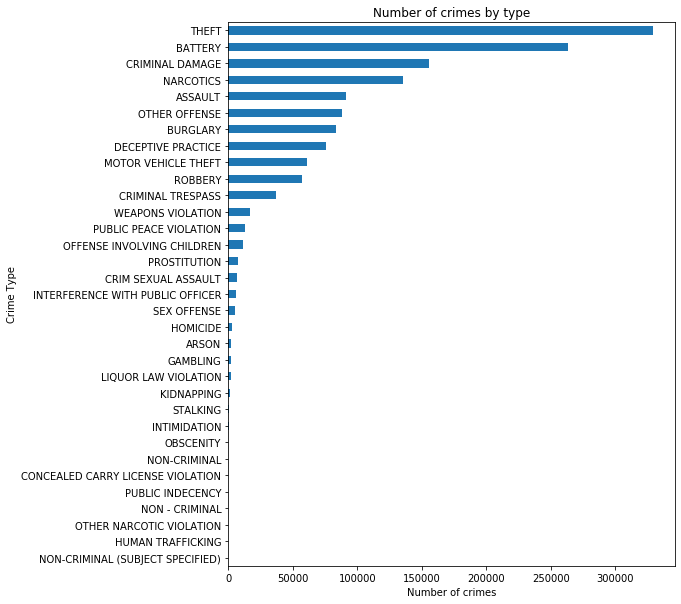

In [192]:
plt.figure(figsize=(8,10))
df2.groupby([df2['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

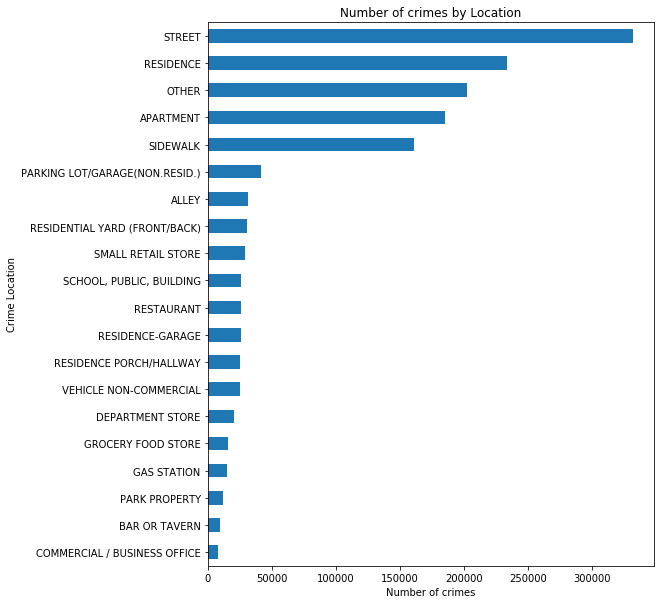

In [193]:
plt.figure(figsize=(8,10))
df2.groupby([df2['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

Study the following relations: 
- Distance from city center and type/quantity of crime
- 

In [194]:
df.corr()

,Unnamed: 0,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
Unnamed: 0,1.000000,0.523202,-0.064176,0.004891,-0.003006,-0.001213,0.004971,-0.009290,0.002432,0.008668,0.597970,0.009668,0.000691
ID,0.523202,1.000000,-0.059896,0.017203,-0.003356,0.000165,0.008312,-0.014964,-0.000477,0.013891,0.836609,0.014663,-0.000862
Arrest,-0.064176,-0.059896,1.000000,-0.062657,-0.022106,-0.021944,-0.010856,0.017212,-0.030289,-0.019733,-0.056723,-0.019655,-0.032327
Domestic,0.004891,0.017203,-0.062657,1.000000,-0.046540,-0.046316,-0.065121,0.075593,0.012224,-0.078539,0.017894,-0.078752,0.012041
Beat,-0.003006,-0.003356,-0.022106,-0.046540,1.000000,0.997372,0.683299,-0.493862,-0.492189,0.585497,-0.008149,0.586491,-0.494017
District,-0.001213,0.000165,-0.021944,-0.046316,0.997372,1.000000,0.686929,-0.494083,-0.495039,0.586399,-0.004745,0.587394,-0.496830
Ward,0.004971,0.008312,-0.010856,-0.065121,0.683299,0.686929,1.000000,-0.542102,-0.405977,0.605661,0.003531,0.606630,-0.406476
Community Area,-0.009290,-0.014964,0.017212,0.075593,-0.493862,-0.494083,-0.542102,1.000000,0.230793,-0.711885,-0.009243,-0.710901,0.224842
X Coordinate,0.002432,-0.000477,-0.030289,0.012224,-0.492189,-0.495039,-0.405977,0.230793,1.000000,-0.267890,-0.000061,-0.268454,0.999698
Y Coordinate,0.008668,0.013891,-0.019733,-0.078539,0.585497,0.586399,0.605661,-0.711885,-0.267890,1.000000,0.008111,0.999992,-0.272461


In [195]:
feats = ['Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location']

df[feats]

,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [196]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [197]:
# eda = ['Location Description', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code','Year', 'Primary Type']
# df_eda = df[eda]
# a = sns.pairplot(df_eda)
# a.savefig("output.png")

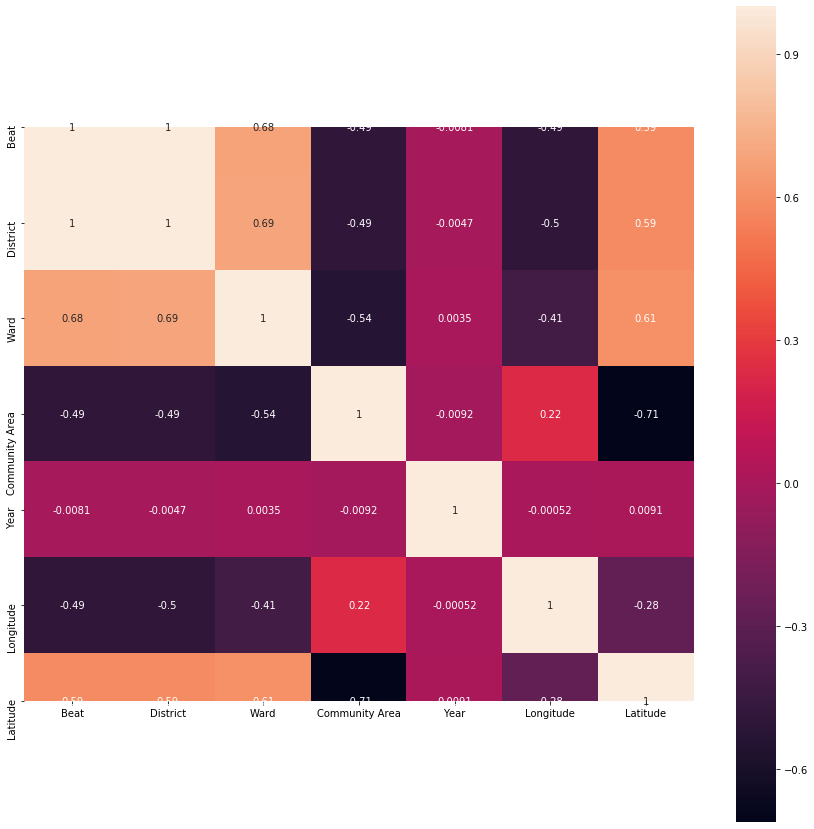

In [198]:
eda = ['Location Description', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code','Year',
       'Longitude','Latitude', 'Primary Type']
df_eda = df[eda]
cor = df_eda.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(cor, annot = True, square = True, vmax = 1)

## Random Forrest ##

In [199]:
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

Don't need the following: 

Description - should overlap with FBI Code
'X Coordinate', 'Y Coordinate' - Long Lat is already there 
location - same as X/Y
'Updated On' - year the crime was commited on is recorded. Don't need updated year

In [200]:
working_features = ['Location Description', 'Arrest','Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
                    'FBI Code','Year','Longitude','Latitude']

target = ['Primary Type']

In [201]:
df = df.dropna()

In [202]:
working_df = df[working_features].copy()

In [203]:
working_df = working_df.rename(columns={"Location Description": "loc_desc", "Community Area": "area",'FBI Code':'FBI'})
working_df.head()

,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude
0,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,-87.706819,41.864073
1,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,-87.604363,41.782922
2,STREET,False,False,1524,15.0,37.0,25.0,24,2016,-87.758372,41.894908
3,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,-87.749516,41.885687
4,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,-87.761751,41.886297


In [204]:
working_df['loc_desc'].unique()

array(['APARTMENT', 'RESIDENCE', 'STREET', 'SIDEWALK',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE PORCH/HALLWAY',
       'VEHICLE NON-COMMERCIAL', 'OTHER', 'RESIDENCE-GARAGE',
       'VEHICLE-COMMERCIAL', 'PARKING LOT/GARAGE(NON.RESID.)',
       'SCHOOL, PUBLIC, GROUNDS', 'CHA PARKING LOT/GROUNDS',
       'MEDICAL/DENTAL OFFICE', 'RESTAURANT', 'SMALL RETAIL STORE',
       'CTA TRAIN', 'SCHOOL, PUBLIC, BUILDING',
       'HOSPITAL BUILDING/GROUNDS', 'DRUG STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'GROCERY FOOD STORE',
       'COLLEGE/UNIVERSITY GROUNDS', 'BANK', 'BAR OR TAVERN',
       'ATHLETIC CLUB', 'SPORTS ARENA/STADIUM', 'PARK PROPERTY', 'ALLEY',
       'VACANT LOT/LAND', 'GAS STATION',
       'POLICE FACILITY/VEH PARKING LOT', 'HOTEL/MOTEL', 'TAXICAB',
       'SCHOOL, PRIVATE, GROUNDS', 'COMMERCIAL / BUSINESS OFFICE',
       'ATM (AUTOMATIC TELLER MACHINE)', 'LIBRARY', 'HIGHWAY/EXPRESSWAY',
       'CONVENIENCE STORE', 'TAVERN/LIQUOR STORE', 'ABANDONED BUILDING',
    

In [205]:
working_df['loc_desc'] = working_df.loc_desc.fillna('APARTMENT')

In [206]:
working_df['loc_desc'] = LE.fit_transform(working_df['loc_desc'])
working_df.head()

,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude
0,17,True,True,1022,10.0,24.0,29.0,08B,2016,-87.706819,41.864073
1,109,False,True,313,3.0,20.0,42.0,08B,2016,-87.604363,41.782922
2,125,False,False,1524,15.0,37.0,25.0,24,2016,-87.758372,41.894908
3,121,False,False,1532,15.0,28.0,25.0,08B,2016,-87.749516,41.885687
4,109,False,True,1523,15.0,28.0,25.0,06,2016,-87.761751,41.886297


In [207]:
working_df['Arrest'] = LE.fit_transform(working_df['Arrest'])
working_df['Domestic'] = LE.fit_transform(working_df['Domestic'])
working_df['FBI'] = LE.fit_transform(working_df['FBI'])
working_df.head()

,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude
0,17,1,1,1022,10.0,24.0,29.0,10,2016,-87.706819,41.864073
1,109,0,1,313,3.0,20.0,42.0,10,2016,-87.604363,41.782922
2,125,0,0,1524,15.0,37.0,25.0,24,2016,-87.758372,41.894908
3,121,0,0,1532,15.0,28.0,25.0,10,2016,-87.749516,41.885687
4,109,0,1,1523,15.0,28.0,25.0,7,2016,-87.761751,41.886297


In [208]:
working_df.isnull().sum()

loc_desc     0
Arrest       0
Domestic     0
Beat         0
District     0
Ward         0
area         0
FBI          0
Year         0
Longitude    0
Latitude     0
dtype: int64

In [209]:
target_df = df[target].copy()
target_df['Primary Type'] = LE.fit_transform(target_df['Primary Type'])

In [210]:
X = working_df
y = target_df

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [213]:
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)
imp = model.feature_importances_

for i in range(0,len(X.columns)):
    print(X.columns[i]," :" ,imp[i])

C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


loc_desc  : 0.04273419337685217
Arrest  : 0.04288777899414751
Domestic  : 0.03364143885977192
Beat  : 0.008517582072790722
District  : 0.0019338553010778694
Ward  : 0.005207890429326637
area  : 0.005121792418962825
FBI  : 0.8047357179292284
Year  : 0.007519033489666028
Longitude  : 0.024735919640900595
Latitude  : 0.022964797487275444


In [214]:
model.score(X_test, y_test)

0.9435265443556482

In [215]:
temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, temp_train)
    print("Model score for no of trees",i," is : ",model.score(X_test, temp_test))

Model score for no of trees 1  is :  0.924648053507842
Model score for no of trees 2  is :  0.9159308399167374
Model score for no of trees 3  is :  0.960309381835088
Model score for no of trees 4  is :  0.9646591833643866
Model score for no of trees 5  is :  0.9670189947203623
Model score for no of trees 6  is :  0.9682763867413823
Model score for no of trees 7  is :  0.9663321839525784
Model score for no of trees 8  is :  0.9685651994745017
Model score for no of trees 9  is :  0.9698155472825187
Model score for no of trees 10  is :  0.9705375791153172
Model score for no of trees 11  is :  0.9711609919660751
Model score for no of trees 12  is :  0.9709813645345008
Model score for no of trees 13  is :  0.9711539477530722
Model score for no of trees 14  is :  0.970195934784676
Model score for no of trees 15  is :  0.9709250108304774
Model score for no of trees 16  is :  0.9716893079412935
Model score for no of trees 17  is :  0.9716611310892819
Model score for no of trees 18  is :  0.971

In [216]:
from sklearn.model_selection import cross_val_score

k_fold_summary = []
for i in range(3,15):
    model = RandomForestClassifier(n_estimators = 20, random_state = 0)
    scores = cross_val_score(model, X=X, y=y, cv=i, n_jobs=6)
    k_fold_summary.append((i,scores.mean()))

C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too

In [217]:
from pprint import pprint
pprint(k_fold_summary)

[(3, 0.9653015538685942),
 (4, 0.9675902699889074),
 (5, 0.969630259433392),
 (6, 0.9700190755209617),
 (7, 0.970493889725196),
 (8, 0.9706439383552756),
 (9, 0.9704882559076036),
 (10, 0.9705755967108016),
 (11, 0.9708137036879492),
 (12, 0.970774961843672),
 (13, 0.9709235866373608),
 (14, 0.9709200841449472)]


## Results Discussions ##


### Classification Report ###

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

TN / True Negative: when a case was negative and predicted negative
TP / True Positive: when a case was positive and predicted positive
FN / False Negative: when a case was positive but predicted negative
FP / False Positive: when a case was negative but predicted positive

Precision – What percent of your predictions were correct

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

Recall – What percent of the positive cases did you catch

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

F1 score – What percent of positive predictions were correct

### Precision Recall Curve ###

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Sensitivity or True Positive Rate = TP/(TP+FN)
Positive Predictive value = TP/(TP+FP)

### ROC Curves ###

Reciever Operating Charecteristic Curve

Usefull when predicting probability of a binary outcome.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. 

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [218]:
from sklearn.metrics import classification_report
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, temp_train)
model.score(X_test, y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       424
           1       0.99      1.00      0.99     18049
           2       1.00      1.00      1.00     51982
           3       1.00      1.00      1.00     16120
           4       1.00      0.19      0.32        21
           5       0.90      0.94      0.92      1230
           6       1.00      1.00      1.00     30552
           7       0.71      0.70      0.71      7272
           8       1.00      1.00      1.00     13641
           9       0.96      0.97      0.97       445
          10       0.99      0.93      0.96       546
          11       0.00      0.00      0.00         6
          12       0.49      0.48      0.49      1248
          13       0.09      0.06      0.07       109
          14       0.46      0.21      0.29       220
          15       0.94      0.91      0.92       406
          16       1.00      1.00      1.00     11876
          17       0.98    

In [219]:
from sklearn.metrics import confusion_matrix
from pprint import pprint
pprint(confusion_matrix(y_test,y_pred))

array([[  398,     0,     9, ...,     0,     0,     0],
       [    0, 18018,    10, ...,    13,     0,     0],
       [    0,    20, 51959, ...,     0,     0,     0],
       ...,
       [    0,   131,     0, ...,     6,     0,     0],
       [    0,     1,     3, ...,     0, 64577,     0],
       [    0,     0,     0, ...,     0,     0,  3303]], dtype=int64)


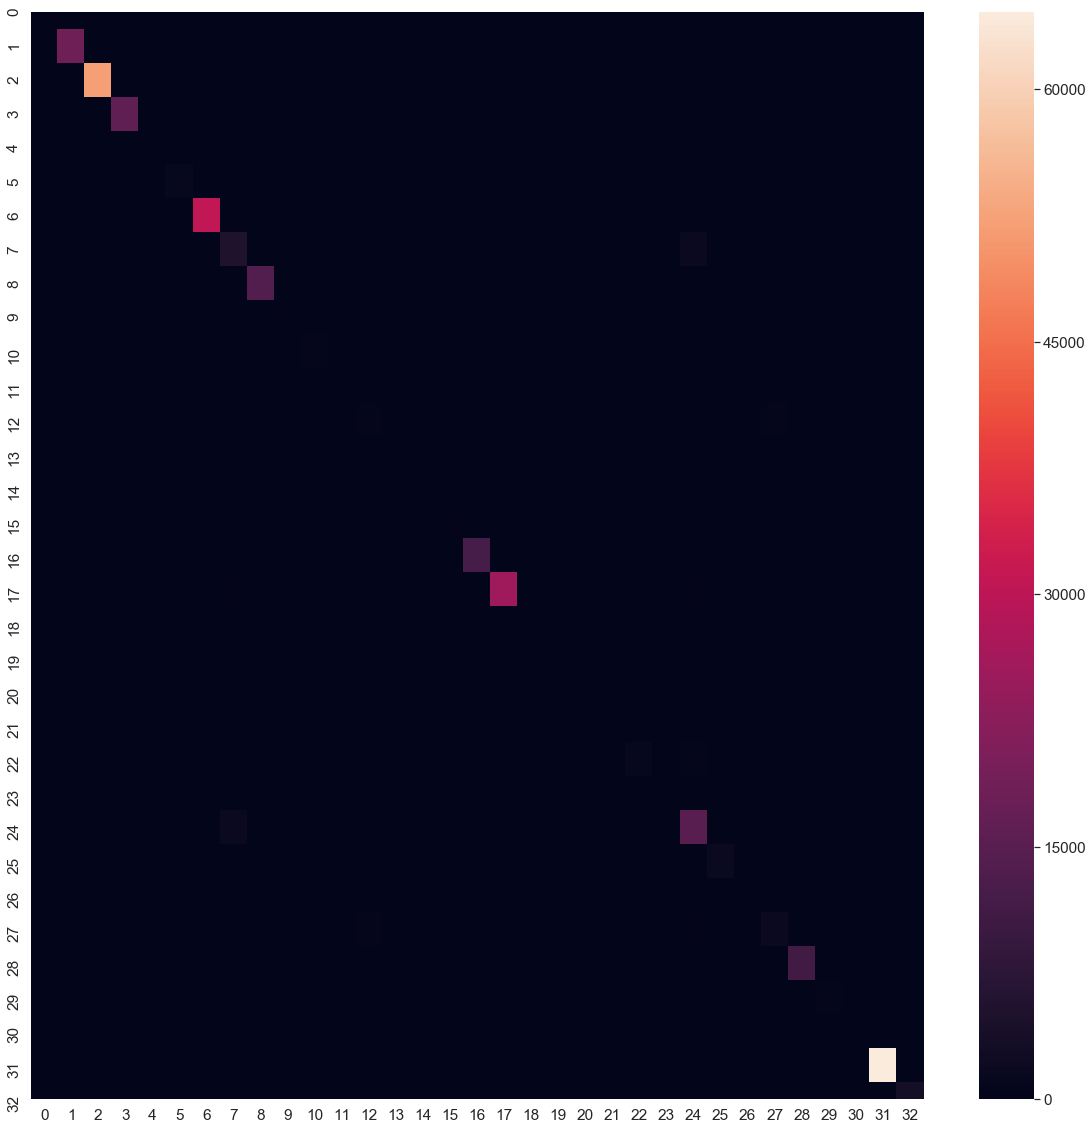

In [220]:
plt.figure(figsize = (20,20))
df_cm = confusion_matrix(y_test,y_pred)
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test,y_pred), annot_kws={"size": 16})# font size

plt.show()

In [221]:
plt.figure(figsize = (20,20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [222]:
# corr(df['Arrest'], df['Description'])

In [223]:
# pd.read_csv("Classifier_inputs.csv",engine='c')

In [224]:
X.columns

Index(['loc_desc', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'area',
       'FBI', 'Year', 'Longitude', 'Latitude'],
      dtype='object')

In [225]:
from sklearn.preprocessing import StandardScaler
feat = ['loc_desc', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'area', 'Year', 'Longitude', 'Latitude'] 
working_df2 = working_df[feat]
# working_df2 = StandardScaler().fit_transform(working_df2)

In [226]:
working_df2 = pd.DataFrame(data = working_df2, columns = feat)

In [227]:
working_df2.head()

,loc_desc,Arrest,Domestic,Beat,District,Ward,area,Year,Longitude,Latitude
0,17,1,1,1022,10.0,24.0,29.0,2016,-87.706819,41.864073
1,109,0,1,313,3.0,20.0,42.0,2016,-87.604363,41.782922
2,125,0,0,1524,15.0,37.0,25.0,2016,-87.758372,41.894908
3,121,0,0,1532,15.0,28.0,25.0,2016,-87.749516,41.885687
4,109,0,1,1523,15.0,28.0,25.0,2016,-87.761751,41.886297


In [228]:
#workingdf2 is dataframe w/o scaling and w/o FBI code
X_train, X_test, y_train, y_test = train_test_split(working_df2,y,test_size=0.2)
model = RandomForestClassifier(n_estimators=10)
temp_train = y_train.values.reshape(-1,)
model.fit(X_train, temp_train)

temp_test = y_test.values.reshape(-1,)
model.score(X_test, temp_test)


0.3826839155962398

In [229]:
y['Primary Type'].unique()

array([ 2, 27, 31, 32, 28, 16,  1, 24,  8,  6,  7,  3, 30,  5, 17, 29, 10,
       22, 12, 25, 14,  9, 13,  0, 15, 21, 19, 26, 11,  4, 18, 23, 20],
      dtype=int64)

In [230]:
y2 = y['Primary Type'].replace({    
0:0,
1:0,
2:0,
3:1,
4:1,
5:1,
6:1,
7:1,
8:2,
9:2,
10:2,
11:2,
12:2,
13:2,
14:2,
15:3,
16:3,
17:3,
18:3,
19:3,
20:3,
21:3,
22:3,
23:3,
24:4,
25:4,   
26:4,
27:4,
28:4,
29:4,
30:5,
31:5,   
32:5,
33:5
})

In [231]:
X_train, X_test, y_train, y_test = train_test_split(working_df2,y2,test_size=0.2)
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [232]:
temp_test = y_test.values.reshape(-1,)
model.score(X_test, temp_test)

0.45961024369454884

In [235]:
y2 = pd.read_csv("primary_type_table.csv")

In [236]:
y2.head()

,primary_type,cluster,count
0,0,4,961
1,1,4,25855
2,2,5,106661
3,3,4,27624
4,4,0,34


In [237]:
y2.columns = ['Primary Type', 'cluster', 'count']
y2 = y2.drop('count',axis=1)
y2.head()

,Primary Type,cluster
0,0,4
1,1,4
2,2,5
3,3,4
4,4,0


In [239]:
y2['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [245]:
print(y['Primary Type'].sort_values(ascending=True).unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]


In [ ]:
y2.set_index('Primary Type')

In [252]:
y2 = y.merge(y2, on='Primary Type', how='left')


MemoryError: 

In [253]:
# y2 = y2['cluster']
y_input = y2['cluster']

In [255]:

X_train, X_test, y_train, y_test = train_test_split(working_df2,y_input,test_size=0.2)
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7321719774162531

In [259]:
X_train, X_test, y_train, y_test = train_test_split(working_df2,y_input,test_size=0.1)
model = RandomForestClassifier(n_estimators=19)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.733997365473616

In [261]:
k_fold_summary = []
model = RandomForestClassifier(n_estimators = 20, random_state = 0)
scores = cross_val_score(model, X=working_df2, y=y_input, cv=5, n_jobs=6)
# k_fold_summary.append((scores.mean()))
print(scores)

[0.73542475 0.73727106 0.72897999 0.70662863 0.71128487]


In [262]:
scores.mean()

0.7239178597673737

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,y_input,test_size=0.2)
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.981301136583768

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(working_df2,y_input,test_size=0.2)
model = RandomForestClassifier(n_estimators=31)
model.fit(X_train, y_train)
model.score(X_test, y_test)